<https://data.kaizhao.net/notebooks/affine-transform.html>

In [1]:
import torch
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import kornia
from kornia.geometry.transform import warp_affine, get_rotation_matrix2d

In [2]:
im = np.array(Image.open('french_bulldog.jpg')).transpose((2, 0, 1))
im = torch.tensor(im).unsqueeze(dim=0)

# Translation

See <https://people.cs.clemson.edu/~dhouse/courses/401/notes/affines-matrices.pdf> for affine transformation matrix.

In [3]:
M = torch.zeros(1, 2, 3)
M[0, :, 2] = 20
M[0, 0, 0] = 1
M[0, 1, 1] = 1
print(M)

tensor([[[ 1.,  0., 20.],
         [ 0.,  1., 20.]]])


In [4]:
im_aff = warp_affine(im.float(), M, [473, 500])

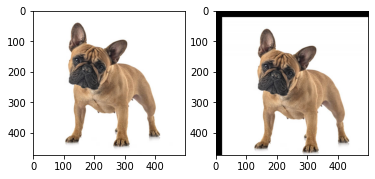

In [5]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im.squeeze(dim=0).numpy().transpose((1,2,0)))
axes[1].imshow(im_aff.squeeze(dim=0).numpy().transpose((1,2,0)).astype(np.uint8))

# Rotation

In [6]:
M = get_rotation_matrix2d(center=torch.tensor([[250, 250]]).float(), angle=torch.tensor([10]).float(), scale=torch.ones(1, 2))

print(M)

tensor([[[  0.9848,   0.1736, -39.6140],
         [ -0.1736,   0.9848,  47.2101]]])


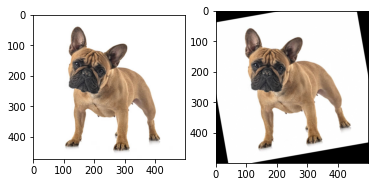

In [7]:
im_aff = warp_affine(im.float(), M, [500, 500])
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im.squeeze(dim=0).numpy().transpose((1,2,0)))
axes[1].imshow(im_aff.squeeze(dim=0).numpy().transpose((1,2,0)).astype(np.uint8))